Heart Disease Prediction

Refer to Python's documentation for each function to see the input arguments, outputs, and methods.

In [250]:
# Import the important packages here
# TO DO
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validation
from sklearn.pipeline import Pipeline




### Part 1) Cleaning data and visualization

In [269]:
# Use pandas.read_excel to read the heart_disease.xlsx file into a dataframe called data

data = pd.read_excel(r'C:\Users\agaur\ML with Python\HW1\heart_disease.xlsx')

In [252]:
# Look at the first 5 rows by using head(5)
data.head(5)


,age,sex,chest_pain,bp,chol,blood_sugar,ecg,heart_rate,angia,oldpeak,slope,vessel_num,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [253]:
# Get the statistics of your dataframe
data.describe()


,age,sex,chest_pain,bp,chol,blood_sugar,ecg,heart_rate,angia,oldpeak,slope,vessel_num,thal,heart_disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [229]:
# Are there any columns that contain a missing value? If yes, substitute those with the mean value of each column!
data.isnull().any() 


age              False
sex              False
chest_pain       False
bp               False
chol             False
blood_sugar      False
ecg              False
heart_rate       False
angia            False
oldpeak          False
slope            False
vessel_num       False
thal             False
heart_disease    False
dtype: bool

None of the columns have missing values

Text(0, 0.5, 'frequency of disease')

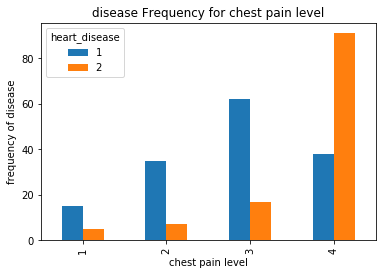

In [230]:
# Look at the disease Frequency for all categorical variables present in the data set
%matplotlib inline
pd.crosstab(data.chest_pain,data.heart_disease).plot(kind='bar')
plt.title('disease Frequency for chest pain level')
plt.xlabel('chest pain level')
plt.ylabel('frequency of disease')



C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'frequency of disease')

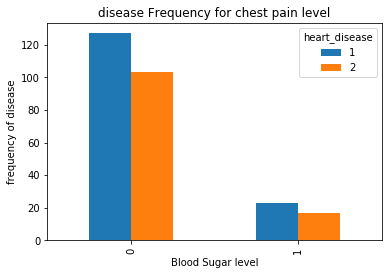

In [231]:

%matplotlib inline
pd.crosstab(data.blood_sugar,data.heart_disease).plot(kind='bar')
plt.subplot(1,1,1)
plt.title('disease Frequency for chest pain level')
plt.xlabel('Blood Sugar level')
plt.ylabel('frequency of disease')


C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'frequency of disease')

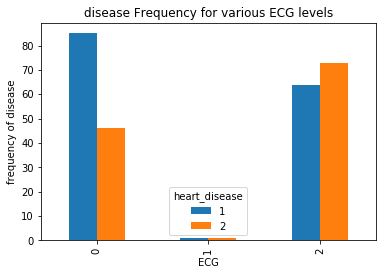

In [232]:
%matplotlib inline
pd.crosstab(data.ecg,data.heart_disease).plot(kind='bar')
plt.subplot(1,1,1)
plt.title('disease Frequency for various ECG levels')
plt.xlabel('ECG')
plt.ylabel('frequency of disease')


Higher ECG vlues increases the chance of a heart disease

Text(0, 0.5, 'frequency of disease')

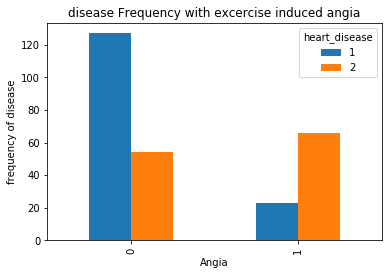

In [233]:
%matplotlib inline
cs = pd.crosstab(data.angia,data.heart_disease).plot(kind='bar')
cs.set_title('disease Frequency with excercise induced angia')
cs.set_xlabel('Angia')
cs.set_ylabel('frequency of disease')


The Graph below clearly shows a trend of higher presence of heart disease when exercise induced angia is present

C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'frequency of disease')

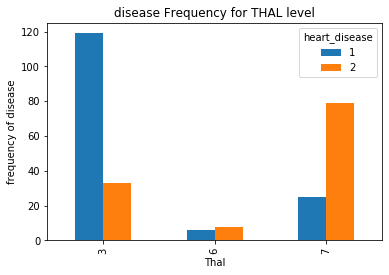

In [254]:
%matplotlib inline
pd.crosstab(data.thal,data.heart_disease).plot(kind='bar')
plt.subplot(1,1,1)
plt.title('disease Frequency for THAL level')
plt.xlabel('Thal')
plt.ylabel('frequency of disease')

In [270]:
# Use pandas.get_dummies and put the column names for the categorical variables 
data = pd.get_dummies(data, columns = ['ecg','chest_pain','thal'])

In [271]:
data.head()

,age,sex,bp,chol,blood_sugar,heart_rate,angia,oldpeak,slope,vessel_num,...,ecg_0,ecg_1,ecg_2,chest_pain_1,chest_pain_2,chest_pain_3,chest_pain_4,thal_3,thal_6,thal_7
0,70,1,130,322,0,109,0,2.4,2,3,...,0,0,1,0,0,0,1,1,0,0
1,67,0,115,564,0,160,0,1.6,2,0,...,0,0,1,0,0,1,0,0,0,1
2,57,1,124,261,0,141,0,0.3,1,0,...,1,0,0,0,1,0,0,0,0,1
3,64,1,128,263,0,105,1,0.2,2,1,...,1,0,0,0,0,0,1,0,0,1
4,74,0,120,269,0,121,1,0.2,1,1,...,0,0,1,0,1,0,0,1,0,0


In [272]:
# What is number of classes disease/not_disease?
data['heart_disease'].value_counts()

1    150
2    120
Name: heart_disease, dtype: int64

There are 150 cases of no have heart disease and 120 cases of heart disease as seen below

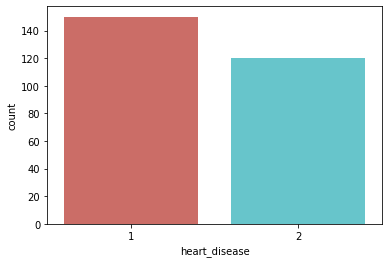

In [273]:
import seaborn as sns
sns.countplot(x='heart_disease', data=data, palette='hls')
plt.show()


In [274]:
# Get your class labels in a variable called y, and remove it from your dataframe . Now, data contains your samples and features, and y contains your labels
y = data['heart_disease']
data.drop('heart_disease', axis=1, inplace=True)

In [275]:
# Split the data into a train and validation set. You won't touch the test set until the very end of this program. 
# Perform any analysis (model selection, hyperparameter selection) on your training data (X_train_outer)
# WE DO NOT TOUCH X_test UNTIL THE END OF THIS PROGRAM!!!!
X_train_outer, X_test, y_train_outer, y_test = train_test_split(data, y, test_size=0.2)
print (X_train_outer.shape, y_train_outer.shape)
print (X_test.shape, y_test.shape)


(216, 20) (216,)
(54, 20) (54,)


### Part 2) Classification using nearest neighbor classifier. Perform 10-fold Cross-validation on your train set to find the best value of k for nearest neighbor classifier (you can also find it by trying different values on the hold-out set you defined above, but since the dataset is small, it is better to perform 10-fold cross-validation. Why? because you may by chance get a hold-out validation set that works well with k=1! you never know! So, do it on 10 different val sets and average them to make sure you got a good k!

In [276]:
# Split X_train_outer again into X_train_inner, X_val, y_train_inner, y_val (We have an inner training set, and the validation set)
X_train_inner, X_val, y_train_inner, y_val = train_test_split(X_train_outer, y_train_outer, test_size=0.2)
print(X_train_inner.shape, y_train_inner.shape)
print(X_val.shape, y_val.shape)

(172, 20) (172,)
(44, 20) (44,)


In [277]:
# Standardize the training set, and then apply the transformation values to the val set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_inner)
X_train_inner_std = scaler.transform(X_train_inner)
X_val_std  = scaler.transform(X_val)

In [281]:
# In each fold of your cross validation, your training fold needs to be first standardized (scaled), then an algorithm be fit
# Then the same transformation will be applied to each validation fold
# This is done by pipeline and is extremely useful when you use GridSearchCV or cross_val_score and etc..
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
steps = [('scaler', StandardScaler()), ('classifier', KNeighborsClassifier())]
pipeline = Pipeline(steps)


In [282]:
# param_candidate defines the set of hyperparameters that you want your function to analyze
param_candidate = [{'classifier__n_neighbors': np.arange(1, 100)}]

In [283]:
# Create a classifier object with GridSearchCV and param_candidate and fit the GridSearchCV object with X_train_outer, and y_train_outer 
# Read Python's documentation if anything is unclear!
# TO DO
clf = GridSearchCV(pipeline, param_grid=param_candidate, cv=10)


In [284]:
clf.fit(X_train_outer,y_train_outer ) 

C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                ver

In [285]:
# print clf.best_score_ (refer to Python's documentation for the attributes of clf)
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.8564814814814815


In [286]:
# View the best parameters for the model found using grid search
print('Best k:',clf.best_params_) 

Best k: {'classifier__n_neighbors': 36}


### Part 3) Perform logistic regression with the default value of C=1, and obtain the cross-validation performance

In [294]:
# Do standardization before classification using Pipeline as Problem 3. You don't need any param_candidate in this case.
# TO DO
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
steps = [('scaler', StandardScaler()), ('classifier', LogisticRegression(multi_class="ovr", C = 1.0))] # If we dont do standarisation,
pipeline = Pipeline(steps) 


In [295]:
# Use the cross_val_score on logistic regression on X_train_outer and y_train_outer with cv=10 and get scores
from sklearn.model_selection import cross_val_score
# TO DO
scores = cross_val_score(pipeline,X_train_outer, y_train_outer, cv =10)

C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\sklearn\linear_model\logistic.py:

In [296]:
scores.mean()

0.842077922077922

### Part 4) Since the performance on the KNN classifier is better, pick the one that gave you the highest performance (accuracy), and train your model using all training data, test it on your test set (which you never touched up until this point) and check performance

In [290]:
# Standardize the training set (X_train_outer), and then apply the transformation values to the test set (X_test)
# TO DO
scaler = StandardScaler().fit(X_train_outer)
X_train_outer_std = scaler.transform(X_train_outer)
X_test_std  = scaler.transform(X_test)

In [291]:
# Fit the best algorithm to X_train_outer_std, y_train_outer
# TO DO
clf.fit(X_train_outer_std,y_train_outer ) 


C:\Users\agaur\Anaconda3\envs\ML with python\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                ver

In [299]:
# Test on your test set X_test_std, and report accuracy_score
# TO DO

print("Accuracy score for the test set = ", round(clf.score(X_test_std,y_test)*100,4),"%")

Accuracy score for the test set =  85.1852 %
